<a href="https://colab.research.google.com/github/QuintessentialChicken98/Colab-Projects/blob/main/Efficient_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from empyrial import empyrial, Engine
import pandas as pd
import pandas_datareader as pdr
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import minimize
sns.set_style('darkgrid')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [ ]:
# Obtain Data
stocks = ['MSFT', 'GOOG', 'GOOGL', 'TSLA', 'NVDA', 'JNJ', 'PG', 'V', 'HD', 'MA', 'ASML', 'ROG.SW', 'AZN', 'NVO', 'UL',
           'TTE', 'SAP', 'GSK', 'OR.PA', 'ALV.DE', 'TSM', 'TCEHY', '9988.HK', 'SONY', '3690.HK', 'RELIANCE.NS', 'INFY',
           '8035.T', '0939.HK', '2454.TW']
start_date = '1980-01-01'
end_date = '2022-03-18'
yahoo_data = pdr.get_data_yahoo(stocks, start_date, end_date)
yahoo_data2 = yahoo_data['Adj Close']


In [ ]:
# Get Returns 
stonks = yahoo_data2
stonks['Date'] = pd.to_datetime(stonks['Date'])
stonks = stonks.set_index('Date')

# Calculate returns
ret = stonks.pct_change() # simple linear returns
log_ret = np.log(1+ret) # log returns
descriptive = log_ret.describe()
var = log_ret.var()
# var
vol = np.sqrt(var*252)
# vol.plot(kind='bar');
cov = log_ret.cov()
# cov
corr = log_ret.corr()
# corr

# Get subsample for trading period:
start_date = ['2022-01-27']
end_date = ['2022-03-18']
log_ret = log_ret.reset_index()
log_ret['Date'] = pd.to_datetime(log_ret['Date'])
log_ret = log_ret.set_index('Date')
period = log_ret["2022-01-27" : "2022-03-18"] 
period_simple = stonks["2022-01-27" : "2022-03-18"] 
period_cov = period.cov()
period_corr = period.corr()
period_var = period.var()
period_vol = np.sqrt(period_var*252)

# Create Weights and Expected Returns:
weights = [0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 
           0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033, 0.033,
           0.033, 0.033, 0.033, 0.033, 0.033, 0.033] # Equal weights
# E(r_i) 
e_r_i = log_ret.mean()
e_r_i_period = period.mean()

# E(r_p)
e_r_p = (e_r_i*weights).sum()
e_r_p_period = (e_r_i_period*weights).sum()

# Portfolio Variance:
pi_weights = {'MSFT': 0.033, 'GOOG': 0.033, 'GOOGL': 0.033, 'TSLA': 0.033, 'NVDA': 0.033, 'JNJ': 0.033,
              'PG': 0.033, 'V': 0.033, 'HD': 0.033, 'MA': 0.033, 'ASML': 0.033, 'ROG.SW': 0.033, 
              'AZN': 0.033, 'NVO': 0.033, 'UL': 0.033,'TTE': 0.033, 'SAP': 0.033, 'GSK': 0.033, 
              'OR.PA': 0.033, 'ALV.DE': 0.033, 'TSM': 0.033, 'TCEHY': 0.033, '9988.HK': 0.033, 
              'SONY': 0.033, '3690.HK': 0.033, 'RELIANCE.NS': 0.033, 'INFY': 0.033,'8035.T': 0.033,
              '0939.HK': 0.033, '2454.TW': 0.033}
pi_var = cov.mul(pi_weights, axis=0).mul(pi_weights, axis=1).sum().sum()
# pi_var
pi_var_period = period_cov.mul(pi_weights, axis=0).mul(pi_weights, axis=1).sum().sum()

# Yearly resample
eriy = stonks.resample('Y').last().pct_change().mean()
eriy_period_simple = period_simple.resample('Y').last().pct_change().mean()

# Portfolio returns annualised:
erpy = (weights*eriy).sum()
erpy_period = (weights*eriy_period_simple).sum()
erpy_period

# Visualise returns for volatility:
securities = pd.concat([eriy, vol], axis = 1)
securities_period = pd.concat([eriy_period_simple, period_vol], axis = 1)
securities.columns = ['Returns', 'Volatility']
securities_period.columns = ['Returns', 'Volatility']
securities

Returns  Volatility
MSFT         0.321473    0.334918
GOOG         0.271979    0.295882
GOOGL        0.271312    0.295823
TSLA         1.059945    0.552241
NVDA         0.565792    0.593256
JNJ          0.150804    0.225337
PG           0.149741    0.226425
V            0.255012    0.295937
HD           0.385133    0.366124
MA           0.311567    0.336792
ASML         0.391622    0.482544
ROG.SW       0.098393    0.216207
AZN          0.140145    0.260899
NVO          0.207966    0.289625
UL           0.140082    0.244348
TTE          0.103408    0.283299
SAP          0.149290    0.385518
GSK          0.177186    0.268976
OR.PA        0.098933    0.251500
ALV.DE       0.088922    0.339701
TSM          0.278251    0.433039
TCEHY        0.298245    0.356339
9988.HK     -0.180040    0.477315
SONY         0.160927    0.339260
3690.HK      0.663289    0.595138
RELIANCE.NS  0.321026    0.440317
INFY         0.152224    0.460147
8035.T       0.213702    0.422601
0939.HK      0.123220    0.301750
2454.TW      0.223762    0.415073

In [ ]:
# The Efficient Frontier: - Brute Force Method
# https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/
p_ret = [] #  portfolio returns
p_vol = [] #  portfolio volatility
p_weights = [] #  asset weights

num_assets = len(stonks.columns)
num_portfolios = 10000 # Simulates returns for 10,000 randomly allocated portfolios

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, eriy) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stonks.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created


Returns  Volatility  MSFT weight  GOOG weight  GOOGL weight  TSLA weight  \
0  0.213804    0.187728     0.064704     0.016594      0.013091     0.041140   
1  0.214583    0.182671     0.064381     0.057047      0.020703     0.050535   
2  0.262722    0.184170     0.034636     0.056831      0.002070     0.061407   
3  0.224427    0.174709     0.009800     0.029832      0.036773     0.027221   
4  0.180506    0.180199     0.022176     0.023210      0.010195     0.004098   

   NVDA weight  JNJ weight  PG weight  V weight  ...  TSM weight  \
0     0.024724    0.059264   0.035778  0.020562  ...    0.057807   
1     0.024325    0.024901   0.007675  0.006624  ...    0.009710   
2     0.050746    0.009354   0.016863  0.015291  ...    0.061772   
3     0.013754    0.006575   0.002527  0.057361  ...    0.013409   
4     0.033295    0.069131   0.030285  0.020968  ...    0.030882   

   TCEHY weight  9988.HK weight  SONY weight  3690.HK weight  \
0      0.041044        0.058540     0.057850        0.060169   
1      0.021680        0.061893     0.031320        0.011124   
2      0.022445        0.012780     0.013940        0.049803   
3      0.047426        0.004533     0.025469        0.031061   
4      0.000792        0.050518     0.008317        0.036795   

   RELIANCE.NS weight  INFY weight  8035.T weight  0939.HK weight  \
0            0.023696     0.059276       0.007022        0.018178   
1            0.030581     0.039984       0.055620        0.011755   
2            0.056865     0.020537       0.023533        0.046062   
3            0.049711     0.066210       0.024001        0.035736   
4            0.061118     0.057560       0.018851        0.029772   

   2454.TW weight  
0        0.040564  
1        0.012465  
2        0.050349  
3        0.063792  
4        0.016888  

[5 rows x 32 columns]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


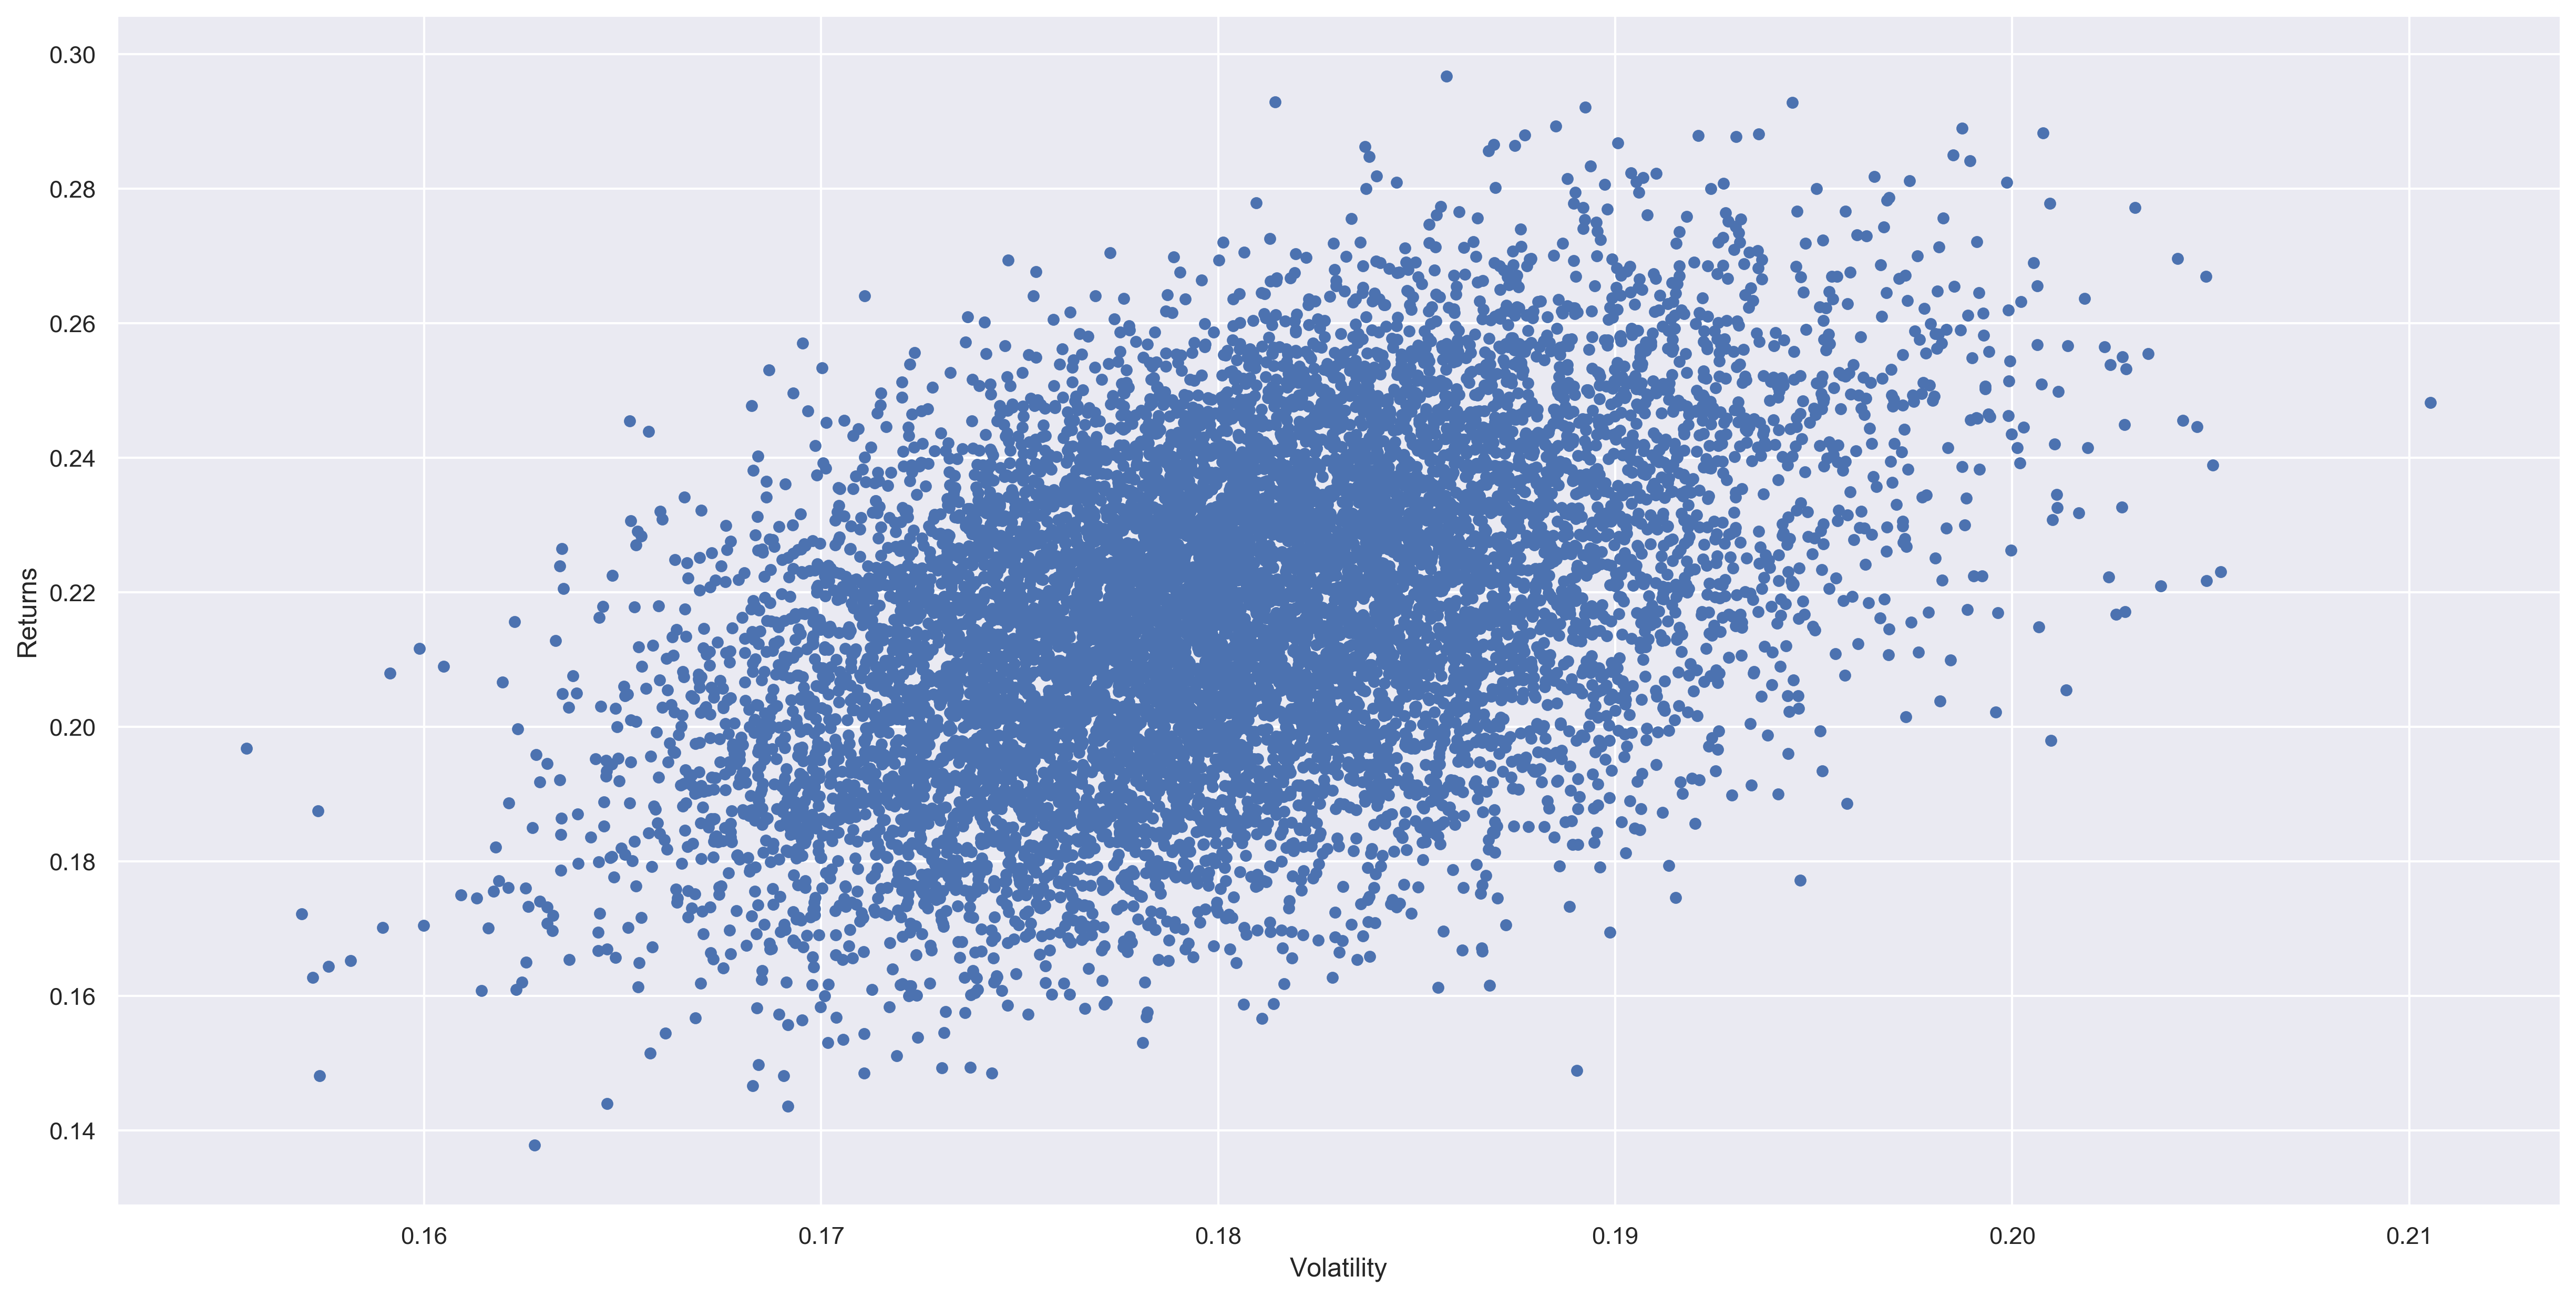

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns',figsize=[20,10]);


In [ ]:
# Minimum Volatility portfolio:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns               0.196758
Volatility            0.155529
MSFT weight           0.030652
GOOG weight           0.028819
GOOGL weight          0.033237
TSLA weight           0.032956
NVDA weight           0.006241
JNJ weight            0.062618
PG weight             0.034522
V weight              0.043344
HD weight             0.050523
MA weight             0.009493
ASML weight           0.003415
ROG.SW weight         0.074646
AZN weight            0.036434
NVO weight            0.038266
UL weight             0.043175
TTE weight            0.005073
SAP weight            0.017592
GSK weight            0.063868
OR.PA weight          0.009330
ALV.DE weight         0.035013
TSM weight            0.003860
TCEHY weight          0.040279
9988.HK weight        0.003164
SONY weight           0.010071
3690.HK weight        0.002847
RELIANCE.NS weight    0.066955
INFY weight           0.063645
8035.T weight         0.032947
0939.HK weight        0.050713
2454.TW weight        0.066304
Name: 10

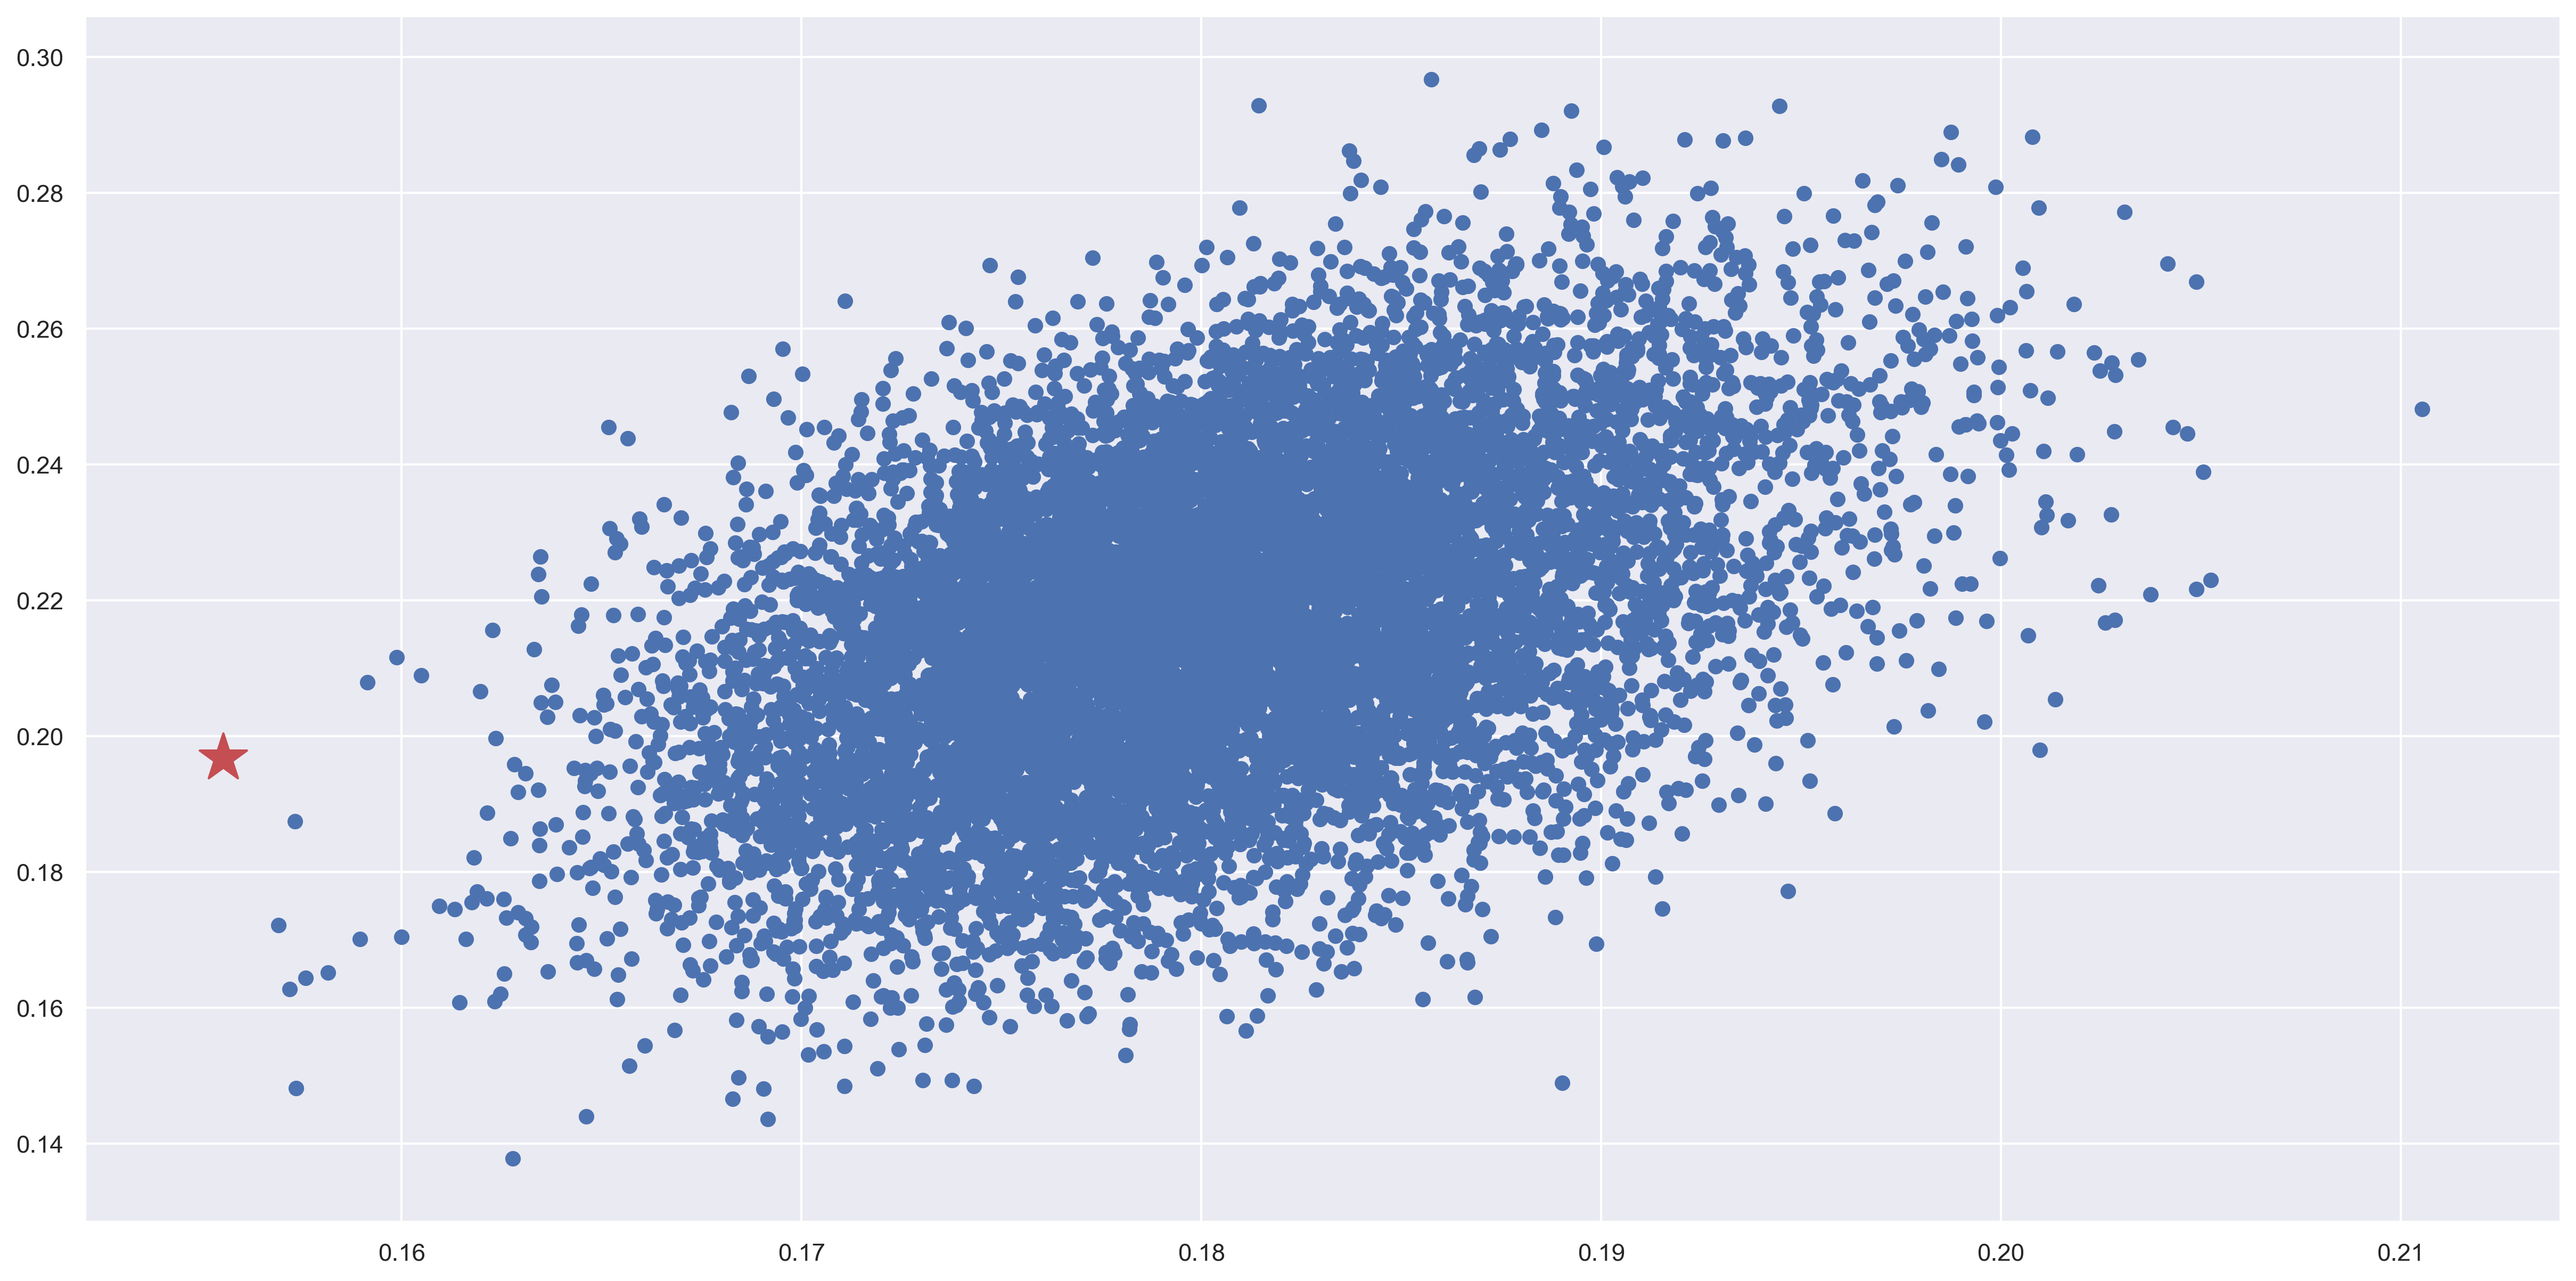

In [ ]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[20,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns']);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500);

In [ ]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns               0.292862
Volatility            0.181438
MSFT weight           0.039570
GOOG weight           0.052679
GOOGL weight          0.037500
TSLA weight           0.074679
NVDA weight           0.058235
JNJ weight            0.051768
PG weight             0.070110
V weight              0.019085
HD weight             0.025570
MA weight             0.012948
ASML weight           0.005942
ROG.SW weight         0.054044
AZN weight            0.036222
NVO weight            0.007990
UL weight             0.018040
TTE weight            0.005154
SAP weight            0.050421
GSK weight            0.001621
OR.PA weight          0.036943
ALV.DE weight         0.001152
TSM weight            0.009768
TCEHY weight          0.073212
9988.HK weight        0.021822
SONY weight           0.018112
3690.HK weight        0.066299
RELIANCE.NS weight    0.055748
INFY weight           0.005315
8035.T weight         0.047359
0939.HK weight        0.008145
2454.TW weight        0.034546
Name: 58

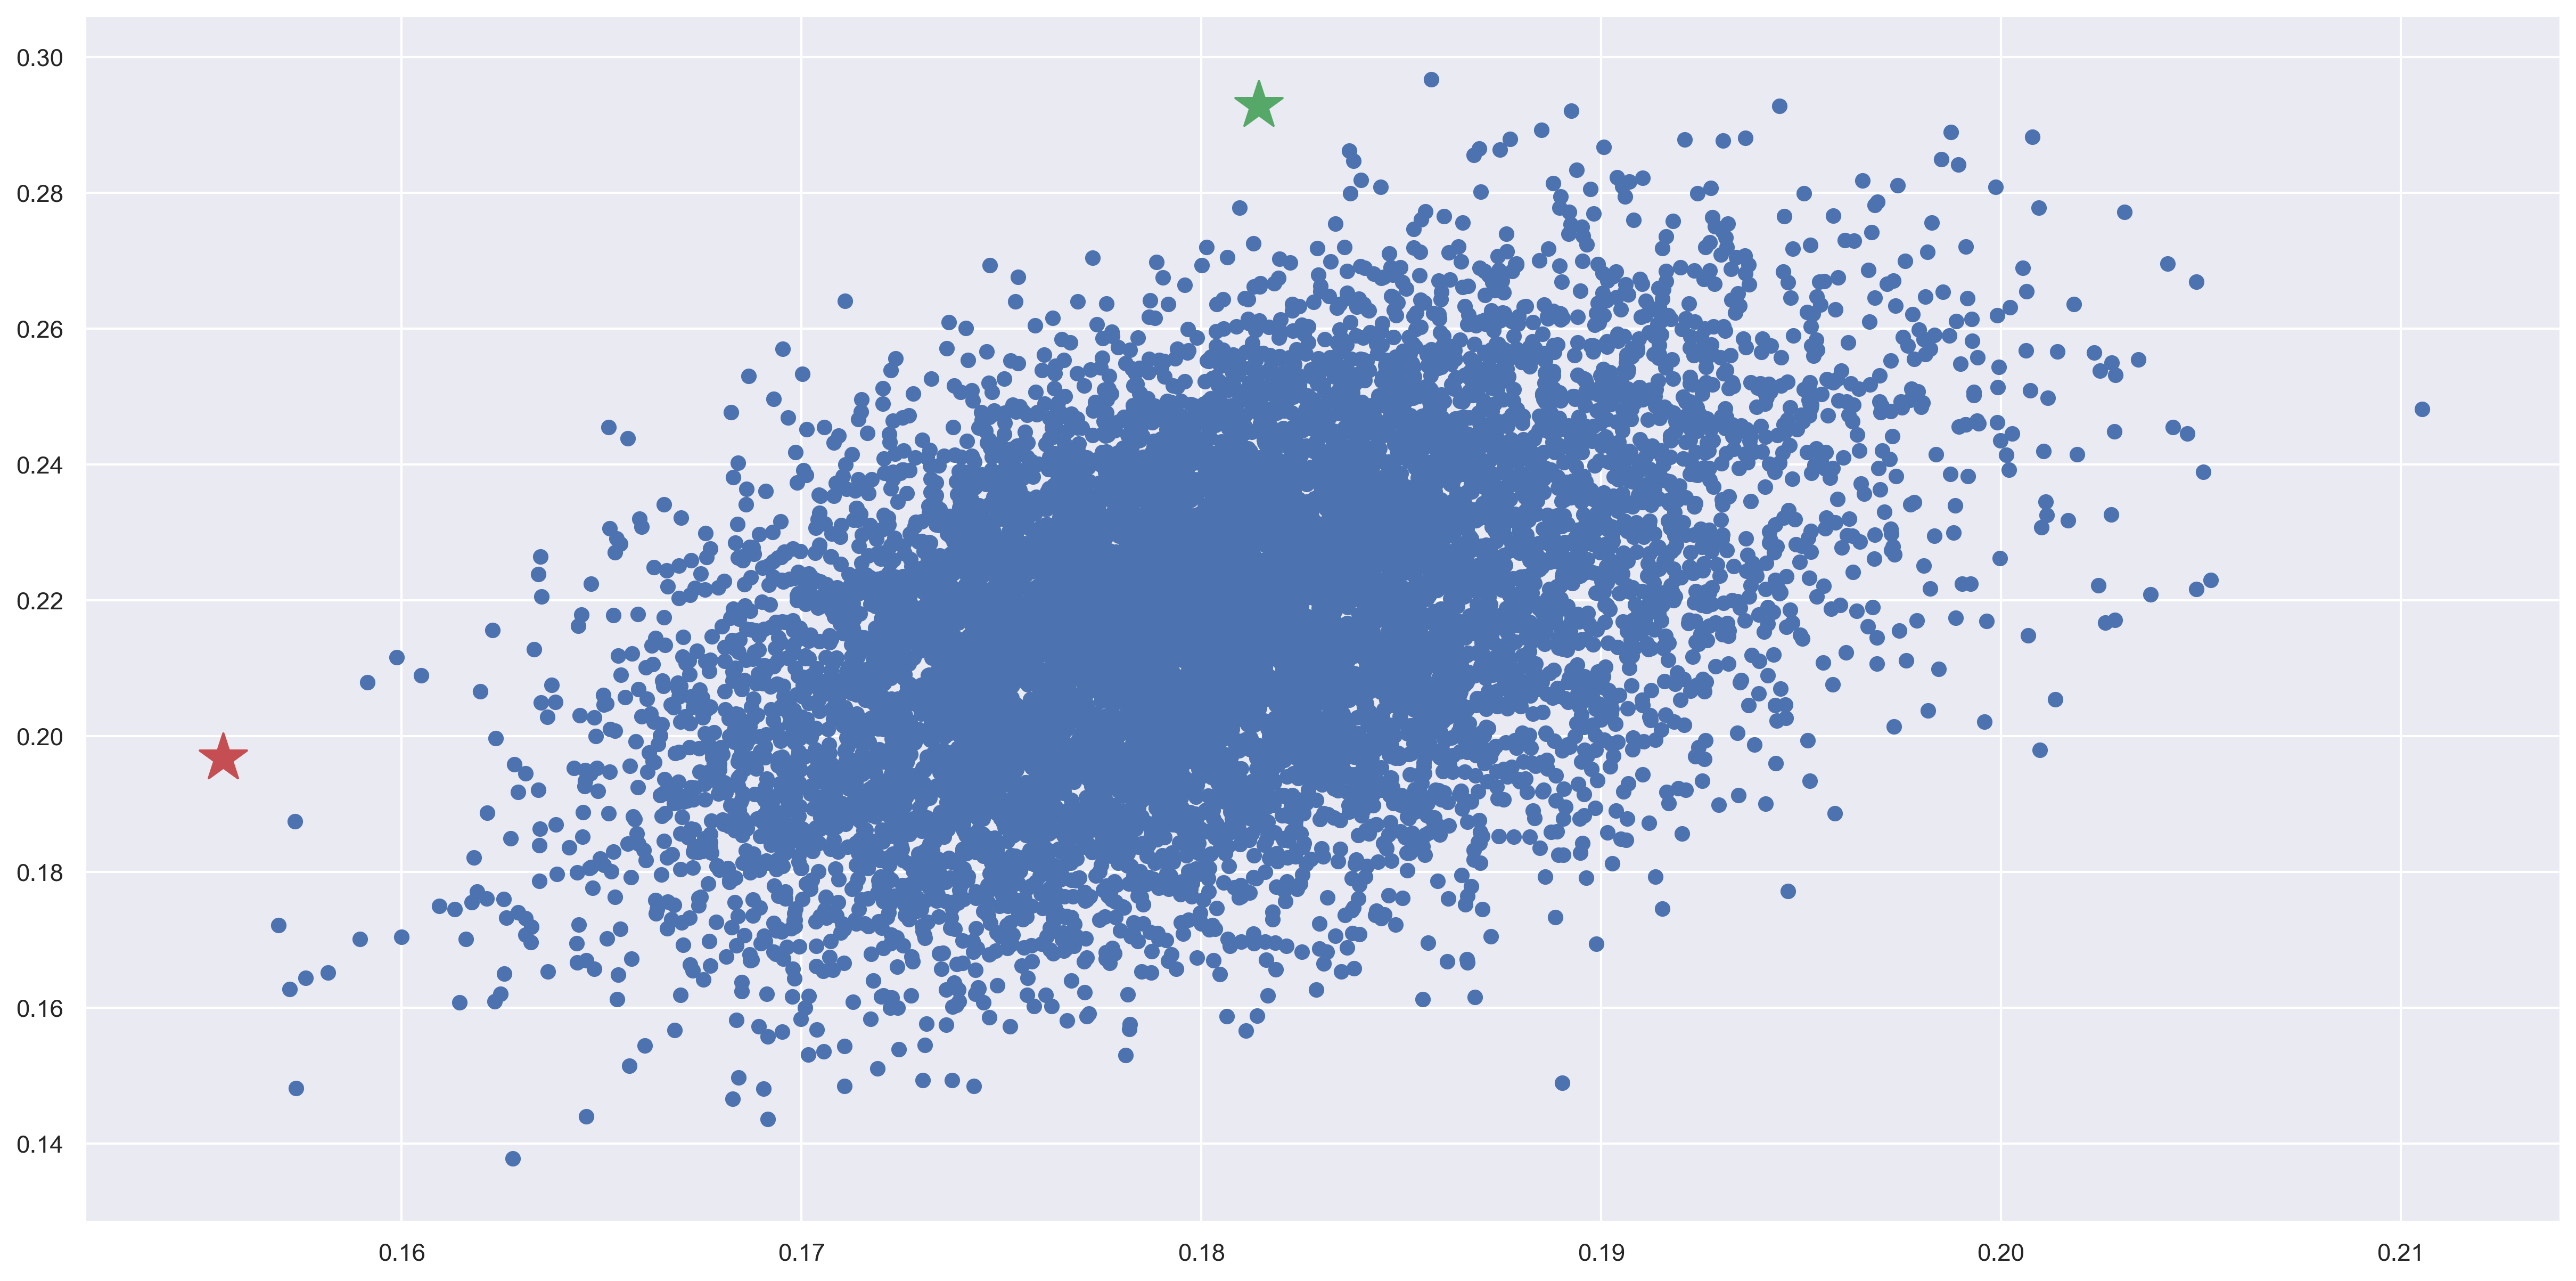

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(20, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns']);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500);

In [ ]:
#https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5
log = np.log(stonks/stonks.shift(1))
log.head()

np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stonks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(30))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [ ]:
print('Max Sharpe: {}'.format(sharpe_arr.max()))
print('Location: {}'.format(sharpe_arr.argmax()))

Max Sharpe: 1.0254899127638335
Location: 5972


In [ ]:
# get all allocations at this max
print(all_weights[5972,:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.02465964 0.04601482 0.0698801  0.07054841 0.06857368 0.0233669
 0.04886418 0.04187231 0.03544567 0.07480307 0.02616228 0.01734751
 0.04218026 0.00639561 0.05539413 0.00017044 0.0132716  0.07419495
 0.01063817 0.00272832 0.01743212 0.01931821 0.00703657 0.02093841
 0.03684392 0.03184113 0.00609555 0.02418259 0.05159423 0.03220522]


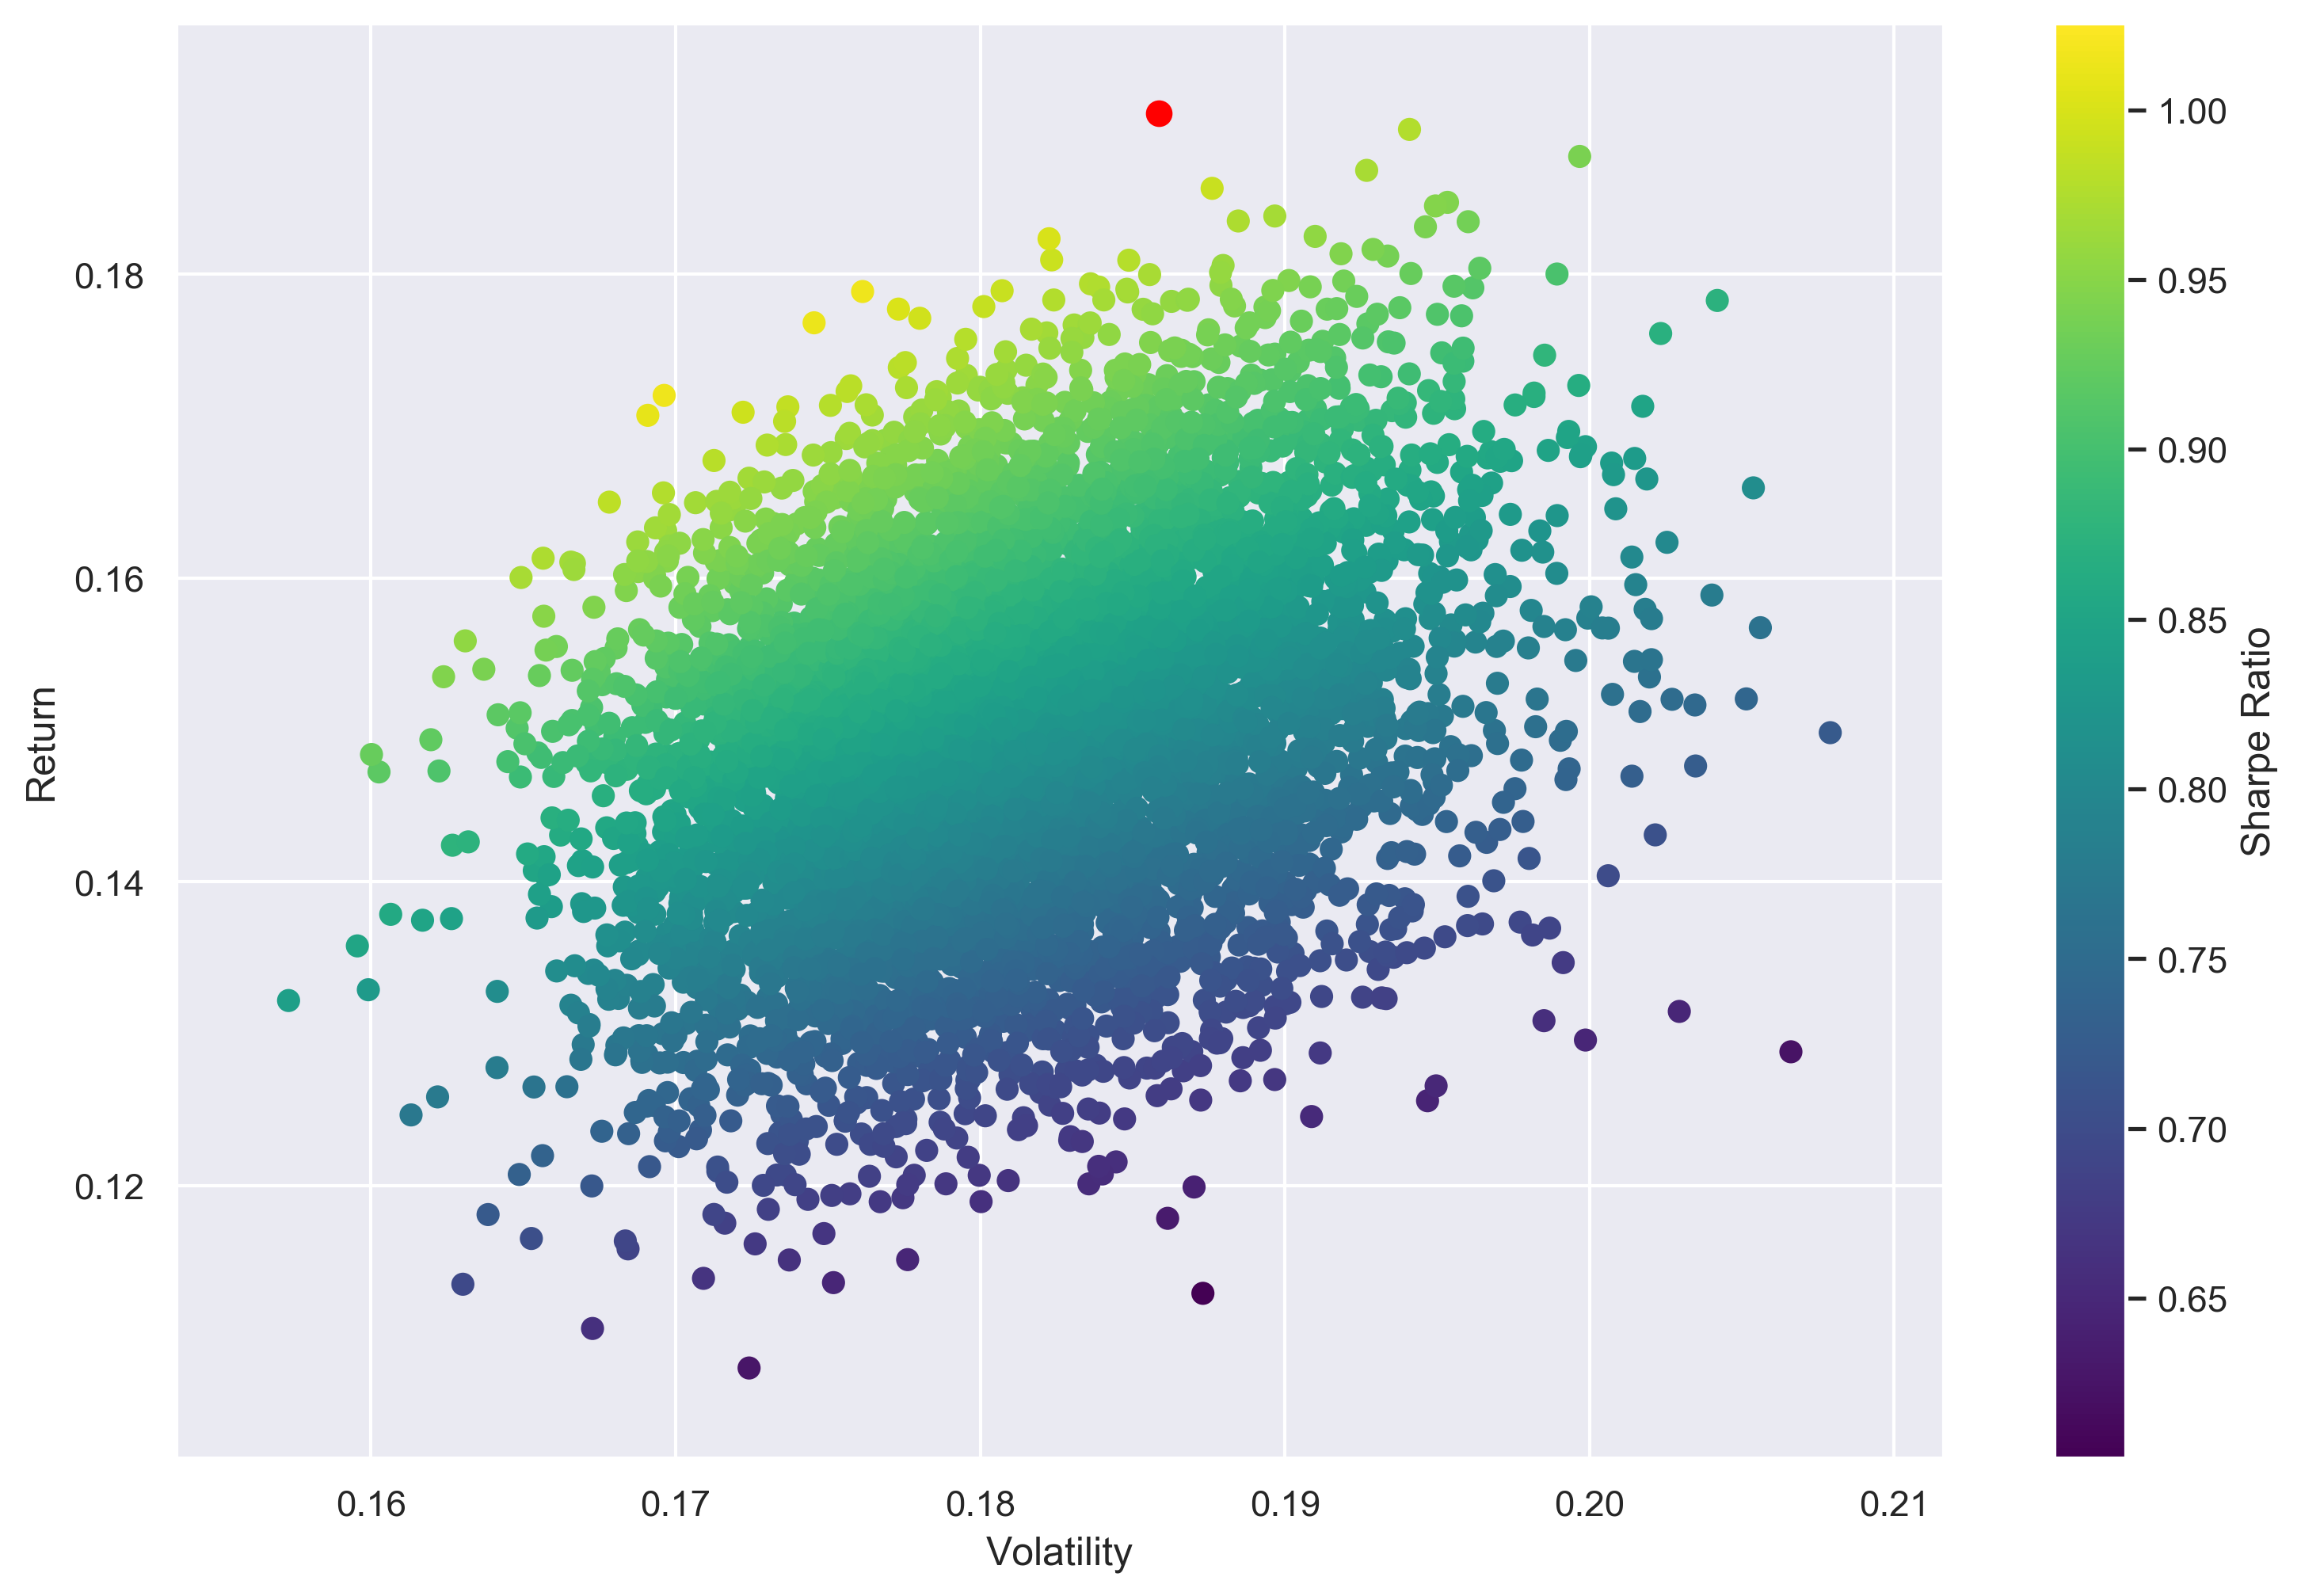

In [ ]:
# Plot EF2
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [ ]:
# Optimisation:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),
         (0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),
         (0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),(0.01,1),
         (0.01,1),(0.01,1),(0.01,1),)
initial_guess = [0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,
                0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,
                0.033,0.033,0.033,0.033,0.033,0.033,]

In [ ]:
optimiser_results = minimize(neg_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(optimiser_results)


     fun: -1.1438660517477794
     jac: array([-0.07813935, -0.07819292, -0.07416241, -0.07874563,  0.17825916,
       -0.07890718, -0.07893564,  0.12151423, -0.07866654, -0.07920542,
        0.23859186, -0.0240794 ,  0.00571449, -0.07888906,  0.02502841,
        0.47647676,  0.6057978 , -0.02889076,  0.14951853,  0.65699138,
        0.56275907, -0.06176071,  2.4434669 ,  0.54872601,  0.03754666,
       -0.07876816,  0.27191631,  0.15543112,  0.00954692, -0.07840894])
 message: 'Optimization terminated successfully.'
    nfev: 423
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.03791585, 0.07026706, 0.01      , 0.13598325, 0.01      ,
       0.08355494, 0.08104726, 0.01      , 0.07966216, 0.09499782,
       0.01      , 0.01      , 0.01      , 0.04393941, 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.09675108, 0.01      , 0.01      , 0.01      , 0.07588116

In [ ]:
get_ret_vol_sr(optimiser_results.x)

array([0.2099851 , 0.1835749 , 1.14386605])

In [ ]:
frontier_y = np.linspace(0,0.2,2)

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,initial_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

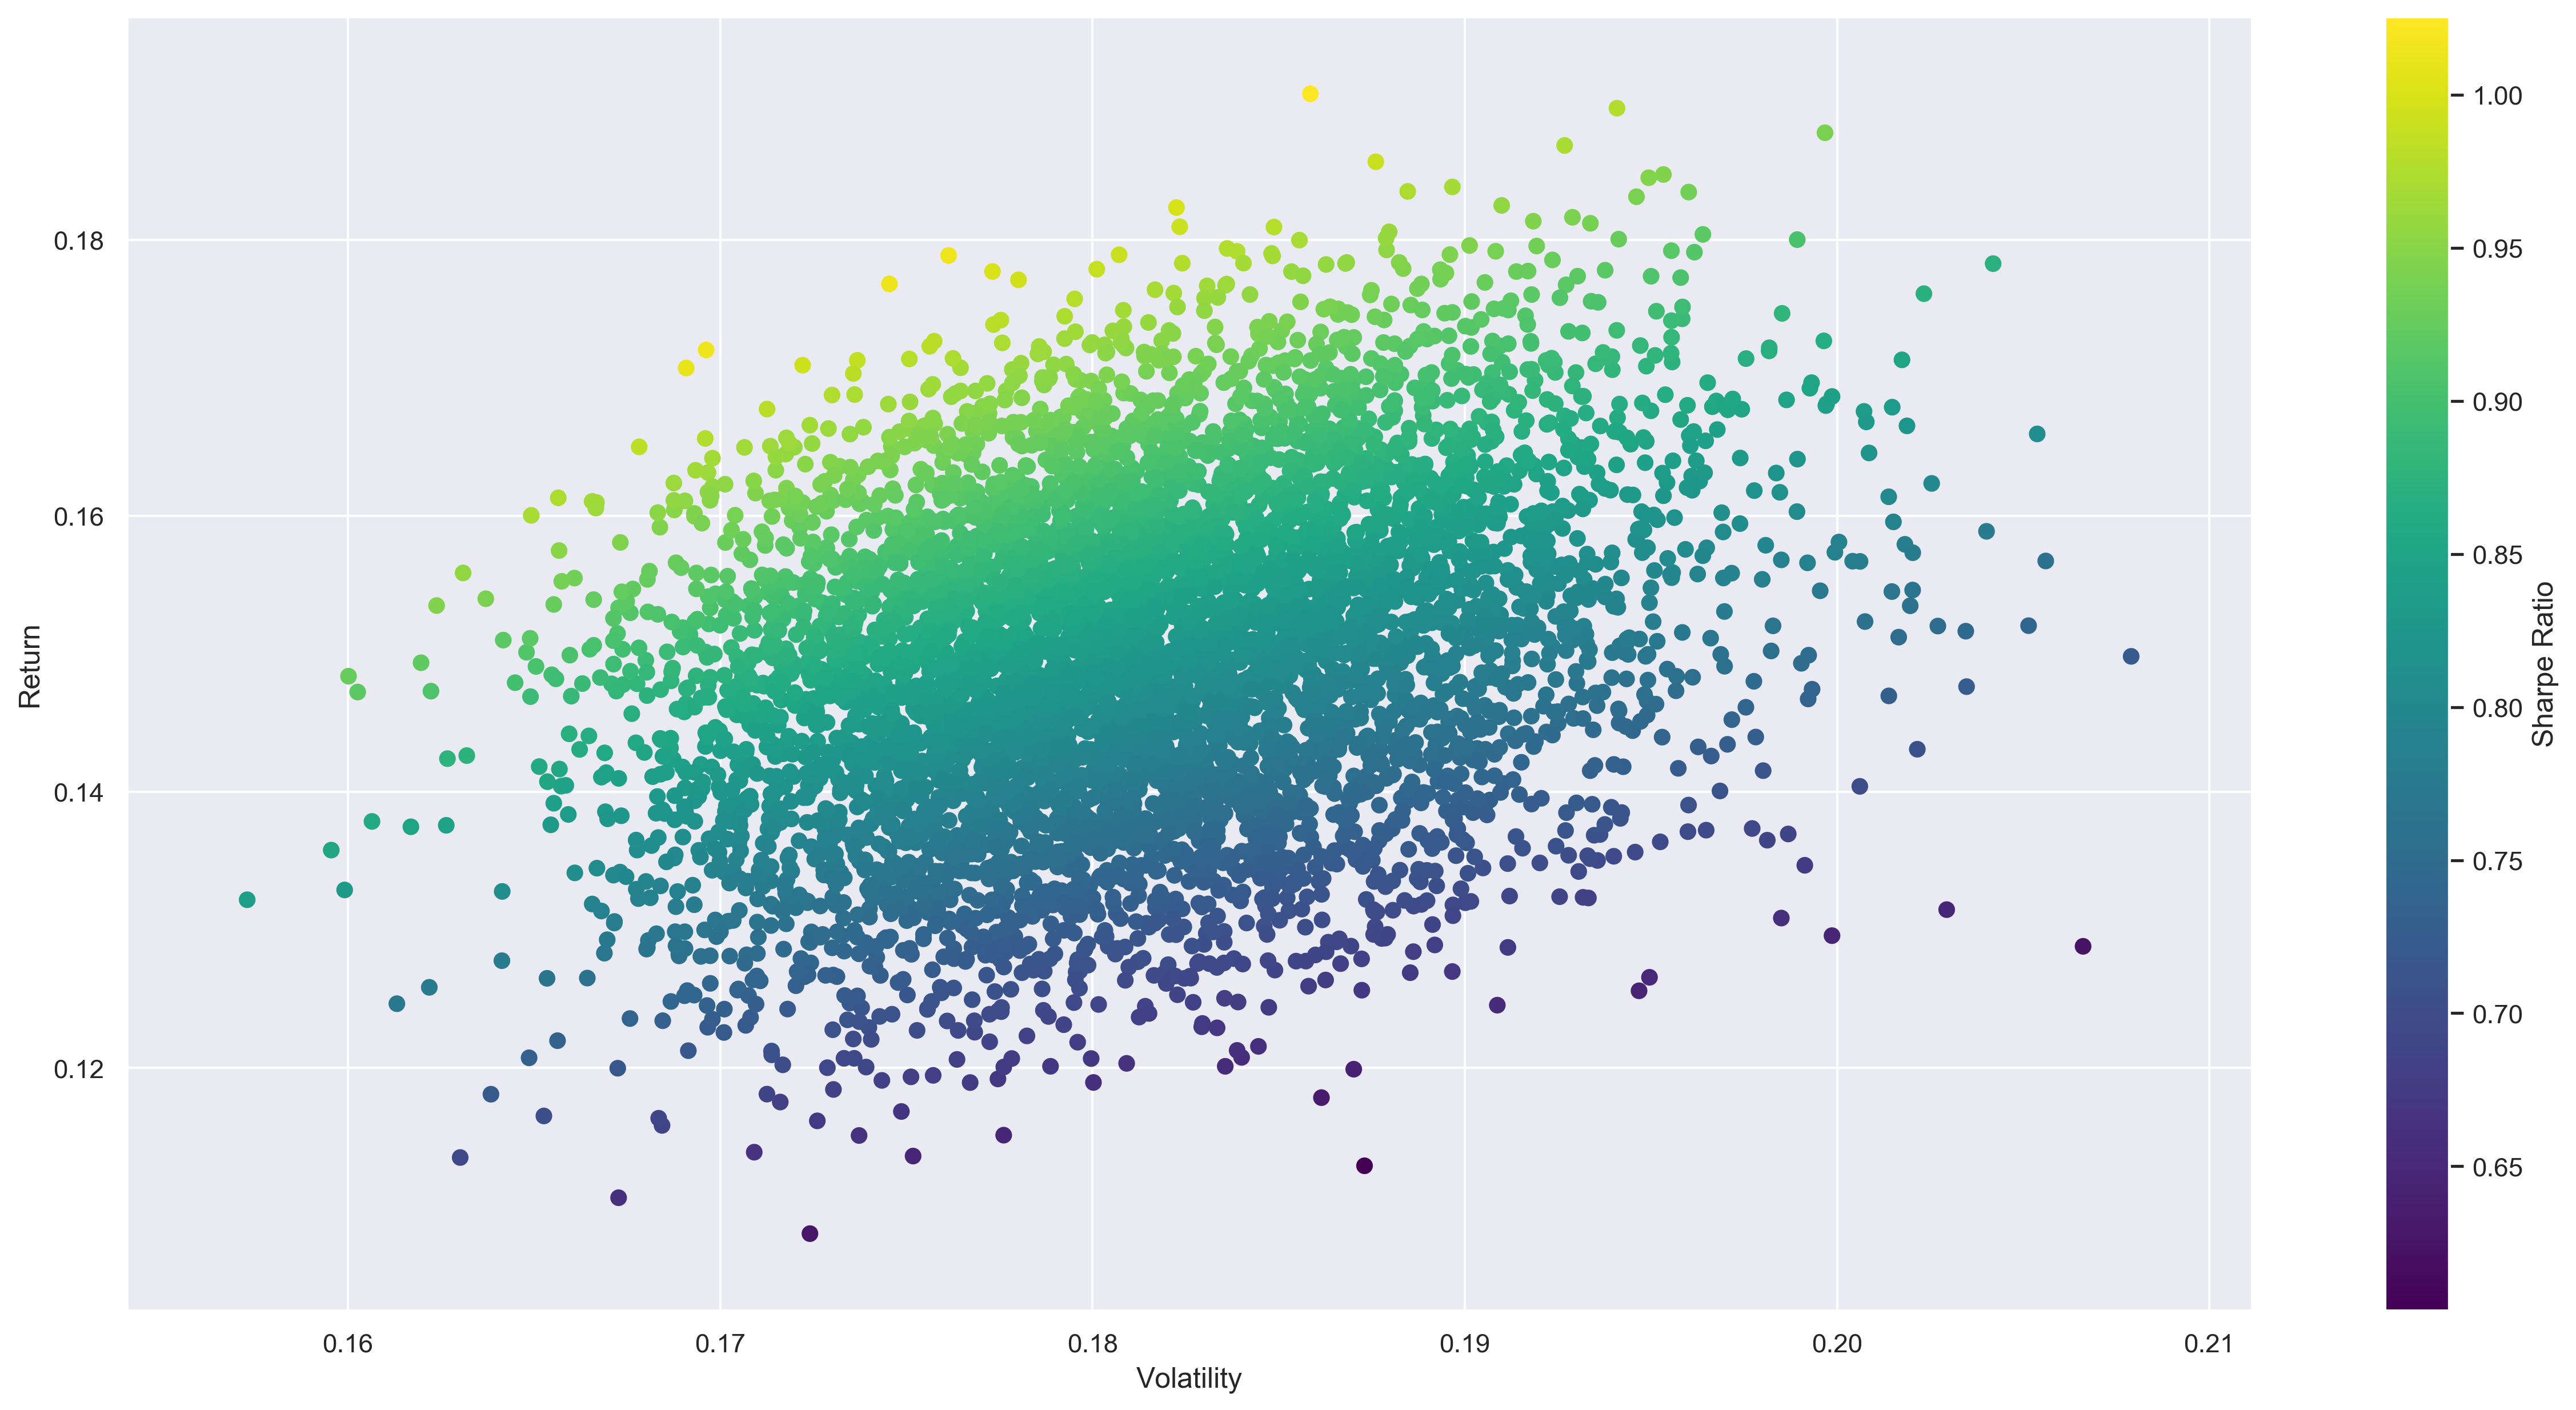

In [ ]:
# Plot EF3
plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
# plt.savefig('cover.png')
plt.show()

In [ ]:
# Obtain optimal weights then run empyrial backtest, and calculate returns for portfolio and plot. 


In [ ]:
# Construct custom benchmark of MSCI indeces 
# 0.3(US)+0.3(EU)+0.3(AC) - if equally weighted
# x(US) + y(EU) + z(AC) - if otherwise weighted
# Compare performance against this.

msci = pd.read_csv('MSCI.csv')
msci.head()

Date  USA ESG LEADERS Standard (Large+Mid Cap)   Log USA  \
0  Jan 27, 2022                                   244.320       NaN   
1  Jan 28, 2022                                   250.150  0.023582   
2  Jan 31, 2022                                   254.634  0.017766   
3   Feb 1, 2022                                   256.094  0.005717   
4   Feb 2, 2022                                   259.370  0.012711   

  AC EUROPE ESG LEADERS Standard (Large+Mid Cap)   Log EUR  \
0                                       1,054.34       NaN   
1                                       1,044.90 -0.008990   
2                                       1,057.36  0.011852   
3                                       1,072.02  0.013770   
4                                       1,082.13  0.009383   

  AC ASIA ESG LEADERS Standard (Large+Mid Cap)  Log ASIA  \
0                                     1,411.02       NaN   
1                                     1,419.22  0.005792   
2                                     1,437.69  0.012929   
3                                     1,443.37  0.003944   
4                                     1,456.41  0.008991   

   Custom Benchmark (Equally Weighted)  Log CB_EW  SPY (Adj Close)  \
0                             812.9037        NaN       429.904449   
1                             814.2810   0.001693       440.581299   
2                             824.9040   0.012962       448.516632   
3                             831.4449   0.007898       451.547241   
4                             839.3703   0.009487       455.933594   

         Date.1  Custom Benchmark (Equally Weighted).1  SPY (Adj Close).1  \
0  Jan 27, 2022                               812.9037         429.904449   
1  Jan 28, 2022                               814.2810         440.581299   
2  Jan 31, 2022                               824.9040         448.516632   
3   Feb 1, 2022                               831.4449         451.547241   
4   Feb 2, 2022                               839.3703         455.933594   

         Date.2    Log CB   Log SPY  
0  Jan 27, 2022       NaN       NaN  
1  Jan 28, 2022  0.001693  0.024532  
2  Jan 31, 2022  0.012962  0.017851  
3   Feb 1, 2022  0.007898  0.006734  
4   Feb 2, 2022  0.009487  0.009667